# Imports

In [1]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import sys
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Fetch & observe data

In [2]:
data_path = './datasets/train.csv'
train_set = pd.read_csv(data_path)
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_path = './datasets/test.csv'
test_set = pd.read_csv(data_path)
#test_set.info()
test_percentage = (418*100)/float(891+418)
print ("Test set is = ", test_percentage, "% of the whole dataset")

Test set is =  31.932773109243698 % of the whole dataset


This is a reasonable split, specially for smaller datasets.

# Clean data
From info() above we see that we have missing values for the attributes:
* Age
* Cabin
* Embarked <br>

We can summarise this visually in a heatmap to quick inform us.<br> 
Next we'll deal with the missing values



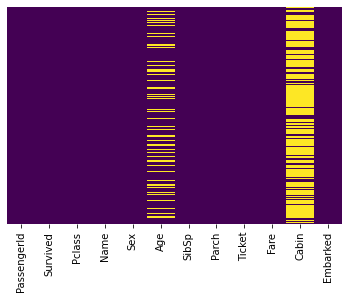

In [6]:
sns.heatmap(train_set.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [7]:
# Column cabin has mostly missing values so we'll just drop this attribute
train_set_1 = train_set.drop("Cabin", axis=1)
#train_set_1.head(3)
#train_set_1.info()

For the Age attribute we'll imput the missing values with possibly the median value <br>
However, we first we'll have to look at the distribution of ages to see if that makes sense

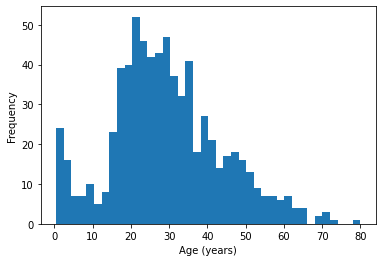

In [8]:
ax = train_set_1['Age'].plot.hist(bins=40)
ax.set_xlabel("Age (years)")
#ax.set_yscale("log")
plt.show()

In [9]:
median = train_set_1["Age"].median()
mean = train_set_1["Age"].mean()
print("mean Age =",mean)
print("median Age =", median)

mean Age = 29.69911764705882
median Age = 28.0


The histrogram shows the ages are mostly unimodal distributted, and we've seen that median and mean are not far away. Hence, using the median to fill the missing values of 'Age' with a typical value is a decent choice.

In [10]:
median = train_set_1["Age"].median()  # Set the (na) to some value, ie. zero, mean, median, mode...
train_set_1["Age"].fillna(median, inplace= True)
train_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We take a look now at the "Embarked" attribute:

In [11]:
train_set_1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since there's only 2 missing values for "Embarked" we are going to just drop these 2 rows from the dataset

In [12]:
train_set_1.dropna(subset=["Embarked"], inplace=True)
train_set_1.shape

(889, 11)

We have now, a dataset that's complete with values but some of them are categorical. In particular these are:

In [13]:
object_attrib = train_set_1.select_dtypes(include=['object'])
object_attrib = list(object_attrib.columns) # to print the list of attributes that are of dtype = object
print(object_attrib)

['Name', 'Sex', 'Ticket', 'Embarked']


# Explore correlations and trends

Before we continue to apply any encoders to these attributes, we'll decide if we drop them completely or not. For instance 'Name' is irrelevant so we drop it, 'Ticket' and 'Embarked' most likely too. To be sure tho, we'll make some barcharts and see how these attributes correlate with the target 'Survival'



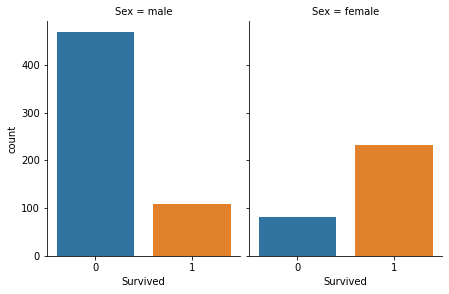

In [14]:
ax = sns.catplot(x="Survived",col="Sex",kind="count",data=train_set_1)
ax.fig.set_size_inches(6,4)
plt.show()

In [15]:
# What's the average survival for each sex?
train_set_1[["Sex", "Survived"]].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.740385
1,male,0.188908


Now we study the survival based on the passenger class. The plot below is nice but a bit difficult to read. It tells us the total counts of people that survived (or not) for each class. Since we have a different number of total passengers in each class, a better idea to grasp which class had more chances of survival, is to look (see after plot) at the mean survival per class. This is a normalised measure so we can compare across classes. It is equivalent to say:<br>

mean_survival_of_class = (total_counts_survival=1_for_this_class)/(total_number_people_in_this_class)


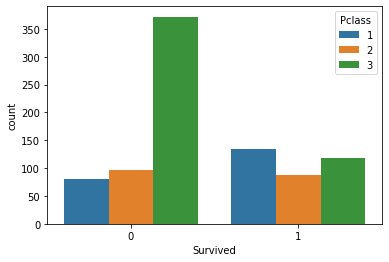

In [16]:
sns.countplot(x="Survived",hue="Pclass",data=train_set_1)
ax.fig.set_size_inches(6,4)
plt.show()

In [17]:
# What's the average survival for each Passenger Class?
train_set_1[["Pclass", "Survived"]].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


We validate that our numbers and the above plot say the same thing, so for that we retrive the total number of people per class and check using the expression above and the number of counts the plot gives us.

In [18]:
train_set_1["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

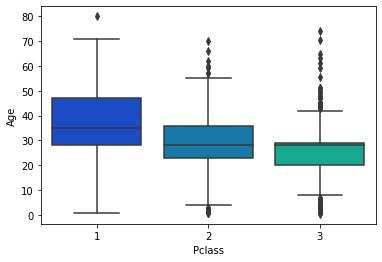

In [19]:
sns.boxplot(x='Pclass',y='Age',data=train_set_1,palette='winter')
ax.fig.set_size_inches(6,4)
plt.show()

## Numerical attributes alone
For the moment we'll study all correlations between numerical attributes.
To do so, we'll create a subsset of training_set_1 that only has the numerical attributes

In [20]:
train_num = train_set_1.drop(object_attrib, axis= 1)
train_num.shape

(889, 7)

Plotting the scatter matrix for the numerical subset of attributes we hope to discover some correlations

In [21]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [22]:
num_attributes = list(train_num.columns)
print(num_attributes)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


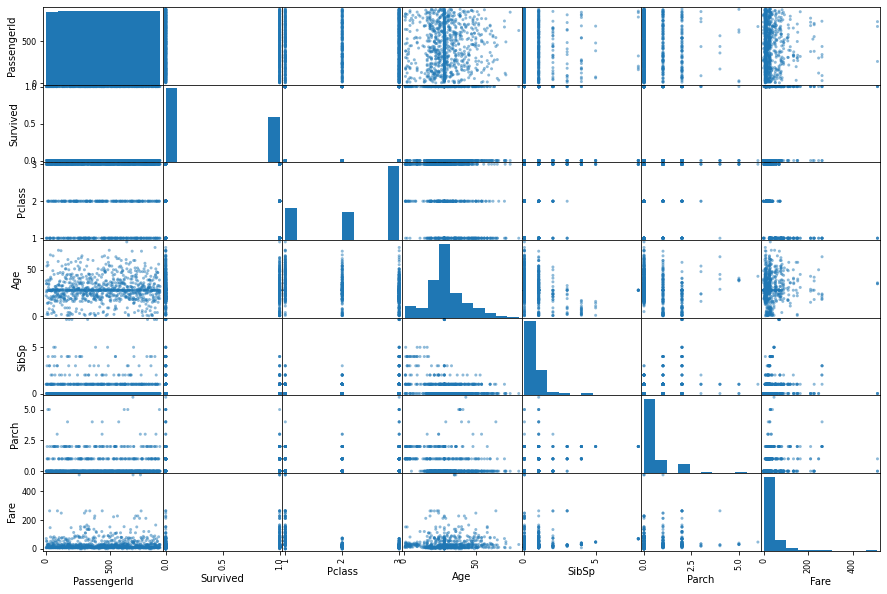

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_num[num_attributes], figsize=(15,10));

## We realise this part for the corrleation matrix of numerical attributes is kinda useless
This is because here, we are interested only in discovering how the features correlate with Survival not necessarily among them. If we had discovered some strong correlation between any two of them, eg. age and fare or age and class, then that could be used to reduce the number of features or combine them for future ML model training.

So, we decide to "manually" study with barcharts the relationship between any (categorical or numerical) variables that we deem potentially interesting with the target Survival

# Train a ML model 
Here we have a classification problem, we want to use our features to discern if someone dies or lives. For that purpose we are going to train a Random Forest model based on some relevant features.




In [24]:
from sklearn.ensemble import RandomForestClassifier

y = train_set_1["Survived"]                      #These are the labels of our training set - after dropping 'Cabin'

features = ["Pclass", "Sex", "SibSp", "Parch"]   #Features we consider could be relevant
X = pd.get_dummies(train_set_1[features])        #Converts categorical data into numerical
X_test = pd.get_dummies(test_set[features])      #Converts categorical data into numerical

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Survived': predictions})
output.sort_values(by=["PassengerId"])

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


The above are our guesses for the test set. Now if we had the true labels for the people on this test set, then we could evaluate the goodness of our model prediction.

# つづく